
Build Model to determine totshopping.rep

Regression model metrics
1. Accuracy Precision Recall
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Suited for multiclass classification

Assumptions made for building this model.
1. Fill all null values as zero *This is a sweeping statement and should not be taken in real life context
2. rows with more than 90% missing data is excluded out.
3. Outlier from Previos Question('totshopping.rep') is excluded out 

Approach considered
Logistic Model
Naive Bayes Classifier

Explaination for approach


Confident in model robustness

Explain model performance


Explain if model is performing well/not well
Model is performing 

Feature Engineering 


In [58]:
import pandas as pd
import pandas_profiling
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [59]:
df_test = pd.read_csv("/Users/YLChua/Desktop/testdata.csv")
df_spend = pd.read_csv("/Users/YLChua/Desktop/spendata.csv" )
df_test.shape,df_spend.shape

((4595, 300), (18379, 301))

Data Exploration on given data set

In [60]:
df_spend.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,...,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,...,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,...,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,...,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,...,0,0,0,0,0,0,0,0,5.0,NaN


In [61]:
df_spend.drop(columns='Unnamed: 0', inplace=True)

In [62]:
df_spend.describe().T

,count,mean,std,min,25%,50%,75%,max
month,18379.0,6.504054,3.468736,1.0,4.0,7.0,9.0,12.0
var8,14370.0,1.967780,0.845175,1.0,1.0,2.0,3.0,3.0
var6,1899.0,2.380200,0.812020,1.0,2.0,2.0,3.0,4.0
a.1,18379.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
a.2,18379.0,6.339681,2.450582,1.0,4.0,6.0,8.0,12.0
...,...,...,...,...,...,...,...,...
c.281,18379.0,0.038359,0.192067,0.0,0.0,0.0,0.0,1.0
c.282,18379.0,0.070352,0.255746,0.0,0.0,0.0,0.0,1.0
c.283,18379.0,0.017683,0.131801,0.0,0.0,0.0,0.0,1.0
f.284,13961.0,3.038536,1.247728,1.0,2.0,3.0,4.0,5.0


In [63]:
#All columns are null
df_test[['pov6']].isnull().sum()

pov6    4595
dtype: int64

Assumptions : 
1. Columns that has more than 90% null values are meant to target specific minority groups that does not represent the masses spening amount.
2. Removal of this columns would give a better overall generalization of spending amount; 'totshopping.rep'
3. Due to limited information provided, this approach is taken

Eliminate columns with less than 90% value 



In [64]:
# maximum no. of rows of null results within a single column
no_of_rows = round(df_spend.shape[0]*0.90,0)
no_of_rows

16541.0

In [65]:
# list of columns where no. of rows 'isnull' do not exceed 10% (90% filled with data)
# this list of columns will be applied to testdata later on
col = df_spend.isnull().sum()[(df_spend.isnull().sum() <= no_of_rows)].index.tolist()
len(col) # number of columns = 270 without 'pov6

271

In [66]:
col.remove('totshopping.rep')

In [67]:
df = df_spend[col]

In [68]:
# check if there are any missing value within 'totshopping.rep'
df['pov6'].isnull().sum()

0

In [69]:
# Divide out into 3 groups by 'dtypes' to check individual groups
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['month', 'a.1', 'a.2', 'a.3', 'a.4', 'var5', 'b.5', 'b.7', 'b.9',
        'b.12',
        ...
        'c.274', 'c.275', 'c.276', 'c.277', 'c.278', 'c.279', 'c.280', 'c.281',
        'c.282', 'c.283'],
       dtype='object', length=164),
 dtype('float64'): Index(['var8', 'var6', 'b.6', 'b.8', 'b.10', 'b.11', 'b.13', 'b.14', 'b.17',
        'b.18',
        ...
        'a.183', 'a.186', 'var2', 'c.189', 'c.190', 'b.195', 'c.214', 'c.222',
        'c.250', 'f.284'],
       dtype='object', length=104),
 dtype('O'): Index(['var9', 'respondent.id'], dtype='object')}

Resolve 'object' related series within dataframe first
Assumptions: 
1. if it is category related, will recategorise it into 1, 2, 3,...


In [70]:
#this means that respondent id can be taken as the id of the person taking the survey
len(df['respondent.id'].unique())

18379

In [71]:
df.drop(columns='respondent.id', inplace=True)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
len(df.columns)

269

In [73]:
df.select_dtypes(include='object').head()

,var9
0,Mono
1,Mono
2,Multi
3,Mono
4,Multi


Var9 => category related 

In [74]:
#  check for null value
df['var9'].isnull().sum()

237

In [75]:
# Assumption => null : 0, mono : 1, Multi : 2 
df['var9'].unique()

array(['Mono', 'Multi', nan], dtype=object)

In [76]:
df['var9'].fillna(value = 0, inplace = True)
df['var9'].isnull().sum()

/Users/YLChua/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [77]:
df = df.replace({'var9':{'Mono': 1,'Multi': 2}})
df['var9'].unique()

array([1, 2, 0])

1. All columns are in numeric form with missing values(null values)
2. Approach => fill all missing values = 0

In [78]:
df.isnull().sum()[(df.isnull().sum() != 0)]

var8       4009
var6      16480
b.6        8079
b.8        1773
b.10      16007
b.11      16007
b.13      11683
b.14      11920
b.20      14234
b.21      15098
c.31      15225
c.39       5359
c.48       4475
c.60       7984
c.77         78
c.92       3090
e.101      4241
f.105     16159
f.106     16160
f.107     16378
f.112     15825
f.113     14983
var4       3090
c.125        77
c.135        67
c.140         4
c.141         3
c.145         1
c.147         1
c.148         1
t7.149       67
t7.153        4
t7.154        2
t7.157        3
t7.158       76
a.183      5360
c.189       298
c.190      5361
b.195     14605
c.214      5356
c.222     15012
c.250       221
f.284      4418
dtype: int64

Assumption: Fill all null values as zero. 
* This is a sweeping statement * In real case sceniro mean/ medium or average value might be more suitable to 'fill in' Nan values 

In [79]:
df.fillna(value=0,inplace=True)

In [80]:
# Double check if there are any null values left
df.isnull().sum().sum()

0

### Edit df_test var9

In [122]:
df_test = df_test.replace({'var9':{'Mono': 1,'Multi': 2}})

In [124]:
df_test['var9'].value_counts()

1    2729
2    1793
0      73
Name: var9, dtype: int64

From Previous Question Remove Outliers

In [81]:
# Eliminate Possible Outliers 
df.drop(index = [10545,3144,18169], inplace=True)
df.shape

(18376, 269)

Method of approach for EDA and elimination of outliers through Regplot
1. Heatmap for correlation of columns against totshopping.rep
2. normal distribution of correlation above 0.4 (anything less would not be able to show sufficient correlation for modelling

In [82]:
df.corr()[['pov6']].isnull().head()

,pov6
month,False
var8,False
var6,False
a.1,True
a.2,False


Null values are checked by plotting Histogram

1. Divide columns into groups 'var', 'a.', 'b.',...
2. Plot histogram for individual group 'a.'

In [83]:
a_cols = fnmatch.filter(df.columns,'*a.*')
b_cols = fnmatch.filter(df.columns,'*b.*')
c_cols = fnmatch.filter(df.columns,'*c.*')
d_cols = fnmatch.filter(df_spend.columns,'*d.*')
e_cols = fnmatch.filter(df_spend.columns,'*e.*')
f_cols = fnmatch.filter(df_spend.columns,'*f.*')
pp_cols = fnmatch.filter(df_spend,'*pp.*')
t_cols = fnmatch.filter(df_spend,'*t.*')
t7_cols = fnmatch.filter(df_spend.columns,'*t7.*')


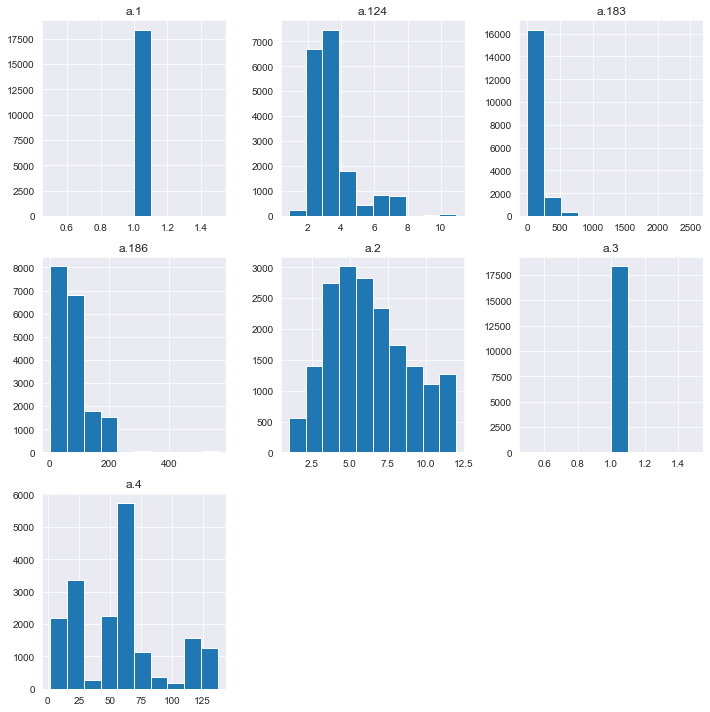

In [84]:
df[a_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show();

From this we can see that a.1 and a.3 are singluarity columns that does not provide an correlation to the overall modelling of pov6

In [85]:
#  Absolute correlation more than 0.4
df_corr = df.corr()[['pov6']][(abs(df.corr()[['pov6']])> 0.4)].dropna(axis = 0).sort_values(by='pov6', ascending = False)
col = df_corr.index.tolist()
col.pop(0)

'pov6'

1. A total of 8 Features are selected (This 8 Features are taken into account for modelling in later stage)


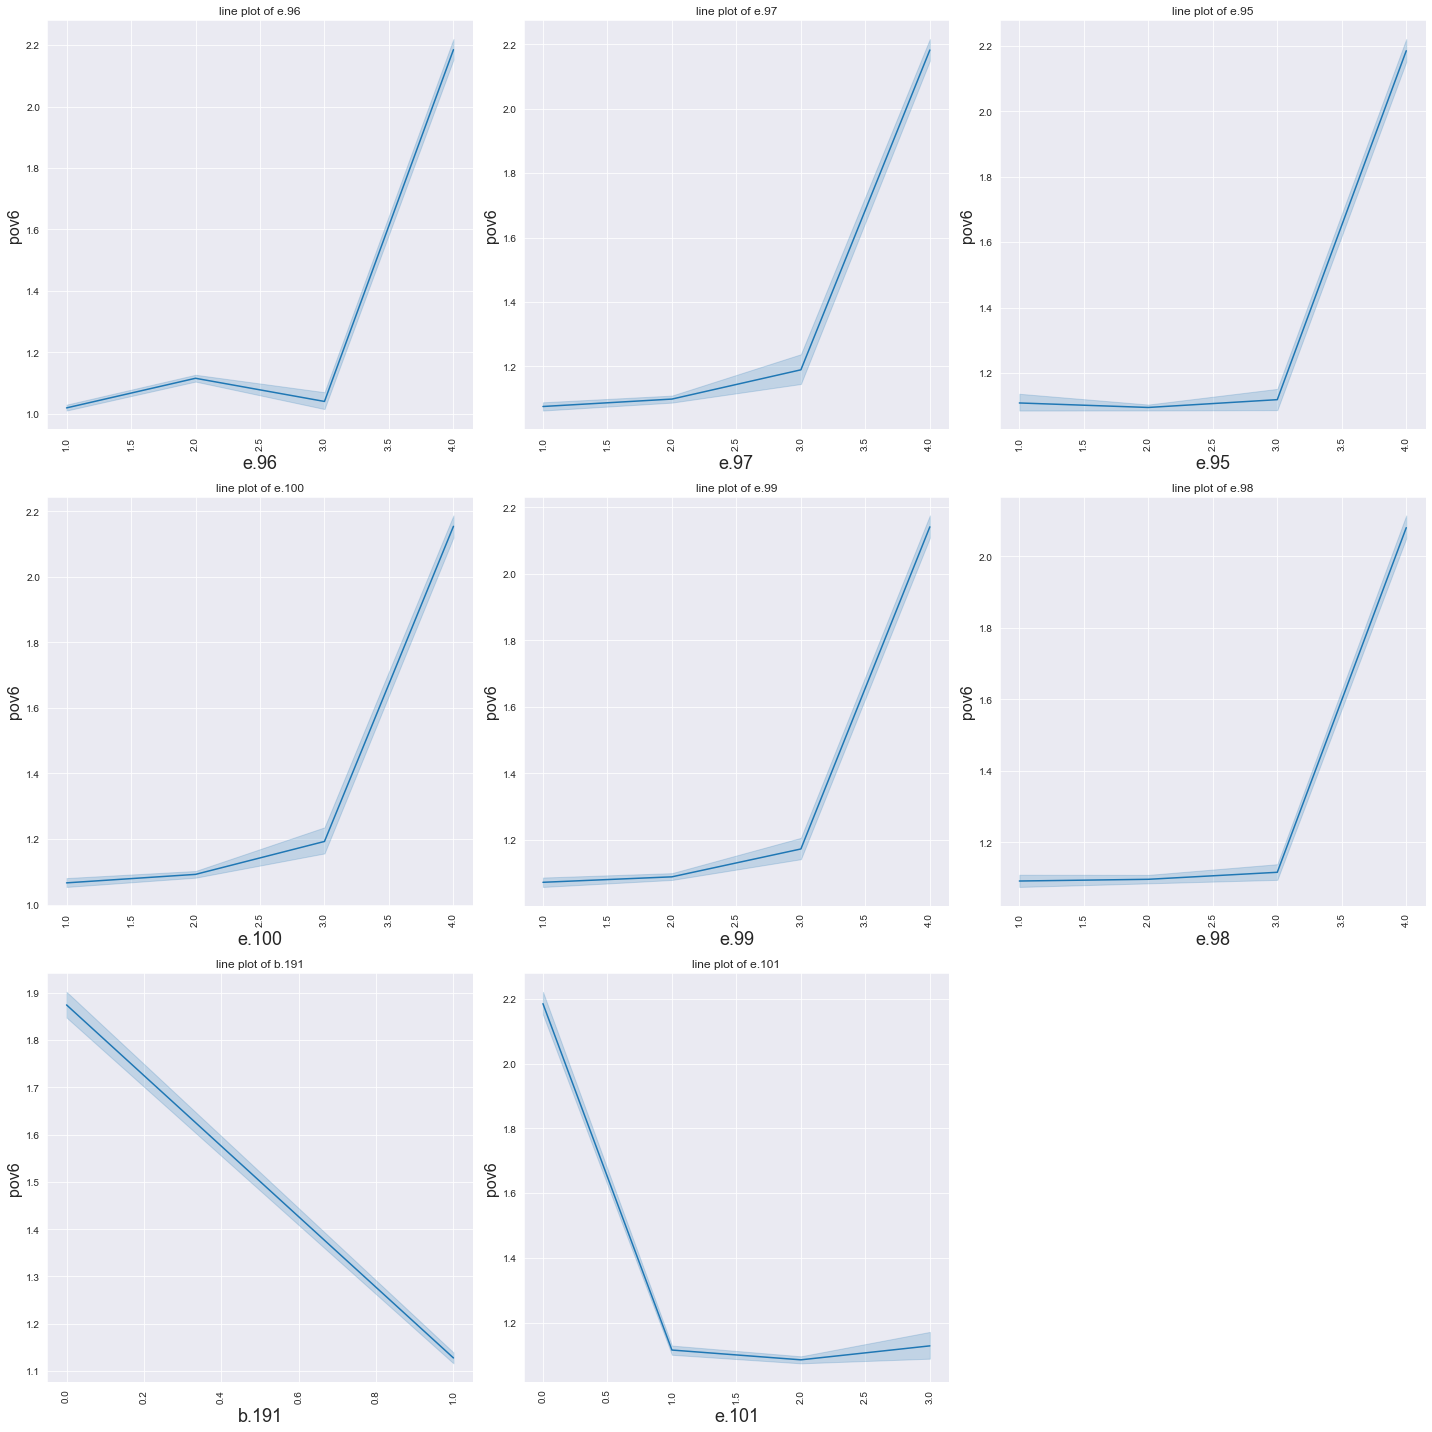

In [86]:
fig = plt.figure(figsize=(20,20))
for i, v in enumerate(col):
    plt.subplot(3,3,i+1)
    sns.lineplot(x=v, y='pov6', data=df)
    plt.title('line plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('pov6', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout() 

(9, 0)

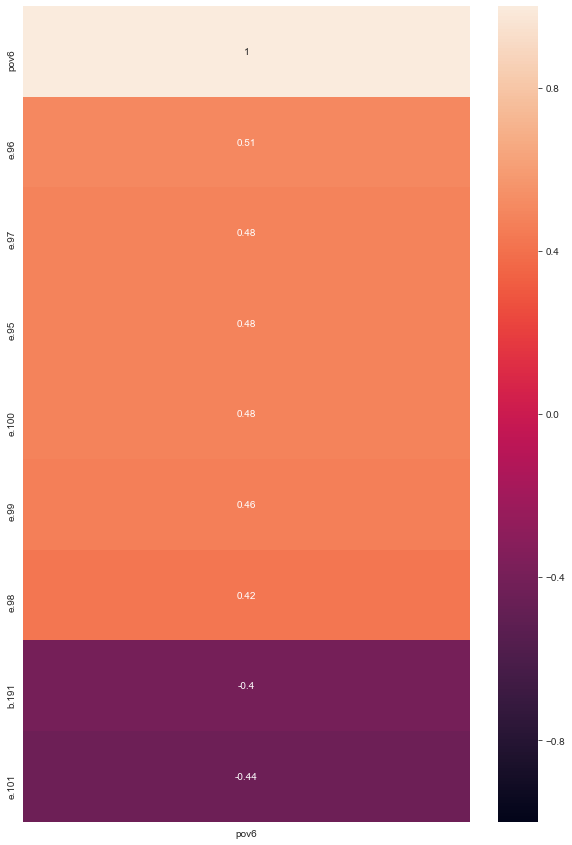

In [87]:
fig = plt.figure(figsize=(10,15))
ax = sns.heatmap(df_corr,annot = True, vmin = -1, vmax= 1)
ax.get_ylim()
ax.set_ylim(9,0)

Important note that all features that are selected with correlation > 0.4 are most likely in categorial questions

All columns are saved to a cleaned CSV. 

In [88]:
df.to_csv('spenddata_cleaned_2.csv', index = False)

In [89]:
col = df.columns.tolist()
col.remove('pov6')

In [90]:
df_test_edit = df_test[col]

In [91]:
df_test_edit.fillna(value=0,inplace=True)

/Users/YLChua/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [92]:
df_test_edit.to_csv('testdata_cleaned_2.csv', index=False)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [94]:
df_train = pd.read_csv('spenddata_cleaned_2.csv', index_col = None)
df_test  = pd.read_csv('testdata_cleaned_2.csv', index_col = None)
df_train.shape, df_test.shape

((18376, 269), (4595, 268))

Test Data Does not contain pov6

In [95]:
df_train.head()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,1,2.0,0.0,1,5,1,57,34,1,0.0,...,0,1,0,0,0,1,0,0,0,5.0
1,1,2.0,0.0,1,4,1,57,34,2,3.0,...,0,0,0,0,0,0,0,1,0,0.0
2,1,2.0,0.0,1,5,1,57,42,2,1.0,...,0,0,0,0,0,0,0,0,0,3.0
3,1,2.0,0.0,1,6,1,57,34,2,4.0,...,0,0,0,0,0,1,0,1,0,5.0
4,1,2.0,0.0,1,8,1,22,1,1,0.0,...,0,0,0,0,0,0,0,0,0,5.0


In [96]:
df_test.head()

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
0,1,1.0,0.0,1,11,1,47,8,2,1.0,...,0,0,0,0,0,0,0,1,0,3.0
1,1,2.0,0.0,1,11,1,65,27,1,0.0,...,0,1,0,0,0,0,0,0,0,3.0
2,1,2.0,0.0,1,6,1,65,27,2,1.0,...,0,0,0,0,0,0,0,1,0,3.0
3,1,1.0,0.0,1,3,1,3,2,1,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,1,1.0,0.0,1,5,1,83,3,1,0.0,...,0,1,0,0,0,1,0,0,0,0.0


In [97]:
features = df_train.columns.tolist()
features.remove('pov6')
len(features)

268

In [98]:
X = df_train[features]
y = df['pov6']

### Model Prep: Train/test split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=27)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12863, 268), (5513, 268), (12863,), (5513,))

In [100]:
y_train.value_counts(normalize=True)

1    0.773770
2    0.177019
3    0.017103
6    0.015626
4    0.009718
5    0.006764
Name: pov6, dtype: float64

It is clear that there is high bias towards Group 1

### Logistic Regression Model

In [101]:
#Simple Log model to determine overall accuracy 
log_model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', random_state=27)

cv_score = cross_val_score(log_model,X_train,y_train,cv=10, scoring ='accuracy')
log_model.fit(X_train,y_train)
pred = log_model.predict(X_test)
score = accuracy_score(y_test,pred)
print('cv_score mean accuracy score: {}, predict accuracy score : {}'.format(cv_score.mean(),score))


/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


cv_score mean accuracy score: 0.7739265297588689, predict accuracy score : 0.7698167966624343


Considering that there are high number of Group 1, it is expected that accuracy might be high. However there is a need to check other group performance

In [102]:
#Prediction only consist of Group 1 and 3
pd.DataFrame(list(pred))[0].value_counts()

1    5511
3       2
Name: 0, dtype: int64

In [103]:
# However y_test consist of all 5 groups. 2-5 are badly predicted
y_test.value_counts()

1    4242
2     969
3     114
6      84
4      58
5      46
Name: pov6, dtype: int64

In [104]:
df_cm = pd.DataFrame((confusion_matrix(y_test, pred,labels=[1,2,3,4,5,6])), index = ['pred'+str(i) for i in range(6)],
                  columns = ['act' + str(i) for i in range(6)])
df_cm

,act0,act1,act2,act3,act4,act5
pred0,4242,0,0,0,0,0
pred1,969,0,0,0,0,0
pred2,112,0,2,0,0,0
pred3,58,0,0,0,0,0
pred4,46,0,0,0,0,0
pred5,84,0,0,0,0,0


In [105]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87      4242
           2       0.00      0.00      0.00       969
           3       1.00      0.02      0.03       114
           4       0.00      0.00      0.00        58
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        84

   micro avg       0.77      0.77      0.77      5513
   macro avg       0.29      0.17      0.15      5513
weighted avg       0.61      0.77      0.67      5513



/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


MultinomialNB Model

In [106]:
mnb_model = MultinomialNB()

cv_score = cross_val_score(mnb_model,X_train,y_train,cv=10, scoring ='accuracy')
mnb_model.fit(X_train,y_train)
pred = mnb_model.predict(X_test)
score = accuracy_score(y_test,pred)
print('cv_score mean accuracy score: {}, predict accuracy score : {}'.format(cv_score.mean(),score))


cv_score mean accuracy score: 0.41468287439356677, predict accuracy score : 0.4055867948485398


In [107]:
#Prediction only consist of Group 1 and 3
pd.DataFrame(list(pred))[0].value_counts()

1    1898
6    1453
4    1303
2     685
3      90
5      84
Name: 0, dtype: int64

In [108]:
# However y_test consist of all 5 groups. 2-5 are badly predicted
y_test.value_counts()

1    4242
2     969
3     114
6      84
4      58
5      46
Name: pov6, dtype: int64

In [109]:
df_cm = pd.DataFrame((confusion_matrix(y_test, pred,labels=[1,2,3,4,5,6])), index = ['pred'+str(i) for i in range(6)],
                  columns = ['act' + str(i) for i in range(6)])
df_cm

,act0,act1,act2,act3,act4,act5
pred0,1764,357,6,1000,44,1071
pred1,110,315,0,256,6,282
pred2,4,0,71,2,22,15
pred3,6,3,0,26,2,21
pred4,5,6,13,4,7,11
pred5,9,4,0,15,3,53


In [110]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.93      0.42      0.57      4242
           2       0.46      0.33      0.38       969
           3       0.79      0.62      0.70       114
           4       0.02      0.45      0.04        58
           5       0.08      0.15      0.11        46
           6       0.04      0.63      0.07        84

   micro avg       0.41      0.41      0.41      5513
   macro avg       0.39      0.43      0.31      5513
weighted avg       0.81      0.41      0.53      5513



Overall speaking MultinomialNB model have a better overall prediction of each of the category

In [111]:
def submission_df(predict):
    df_test_original = pd.read_csv("/Users/YLChua/Desktop/testdata.csv")
    df_sumbit = pd.DataFrame(df_test_original['respondent.id'])
    df_sumbit['pov6.rep'] = predict
    df_sumbit.set_index(['respondent.id'], inplace = True)
    df_sumbit.to_csv('answer_2.csv')

In [127]:
pred_mnb_model = mnb_model.predict(df_test[features])

In [130]:
pd.DataFrame(pred_mnb_model)[0].value_counts()

1    1648
4    1135
6    1123
2     558
3      77
5      54
Name: 0, dtype: int64

In [133]:
submission_df(pred_mnb_model)

In [131]:
pred_log_model = log_model.predict(df_test[features])

In [132]:
pd.DataFrame(pred_log_model)[0].value_counts()

1    4594
3       1
Name: 0, dtype: int64